<a href="https://colab.research.google.com/github/denise25maciel/analiseDadosPython/blob/main/vd7_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 7: dados udemy

O dataset contém dados de todos os cursos por assunto. 

# Etapa 1: importando arquivos e bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/vd7_udemy.csv')

# Etapa 2: conhecendo os dados

In [ ]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.shape

(3682, 11)

In [ ]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

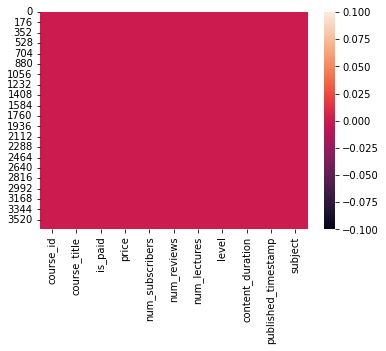

In [ ]:
sns.heatmap(df.isnull())

# Etapa 3: respondendo as questões

# Q1: Quais os diferentes assuntos (subjects) abordados nos cursos da Udemy?

In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [ ]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
df['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [ ]:
df['subject'].nunique()

4

# Q2: Quais dos cursos são gratuítos ou pagos?

In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [ ]:
df.groupby('is_paid').count()

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
is_paid,,,,,,,,,,
False,310,310,310,310,310,310,310,310,310,310
True,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372


In [ ]:
#alternativa
df[df['is_paid']==True].count()

course_id              3372
course_title           3372
is_paid                3372
price                  3372
num_subscribers        3372
num_reviews            3372
num_lectures           3372
level                  3372
content_duration       3372
published_timestamp    3372
subject                3372
dtype: int64

In [ ]:
#alternativa
df[df['is_paid']==False].count()

course_id              310
course_title           310
is_paid                310
price                  310
num_subscribers        310
num_reviews            310
num_lectures           310
level                  310
content_duration       310
published_timestamp    310
subject                310
dtype: int64

# Q3: apresentar os 5 cursos que mais vendem

In [ ]:
df.sort_values('num_subscribers', ascending = False).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development


# Q4: apresentar os 5 cursos que menos vendem

Considerando qualquer valor

In [ ]:
df.sort_values('num_subscribers', ascending = True).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance
3259,1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,1.5 hours,2017-06-28T16:05:51Z,Business Finance
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18T17:56:36Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance


Considerando valores maiores que 1

In [ ]:
df.query('num_subscribers>0').sort_values('num_subscribers', ascending = True).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2253,1232728,Learn Loreena McKennitt Songs-Quicklessons Pia...,True,20,1,0,6,All Levels,34 mins,2017-05-29T03:40:21Z,Musical Instruments
167,872816,Adobe Illustrator in Under 10: Fast info at yo...,True,30,1,0,34,All Levels,3.5 hours,2016-06-23T03:51:13Z,Graphic Design
1612,1105636,How to Design A 2D Character in Illustrator,True,20,1,1,9,Beginner Level,1 hour,2017-02-08T22:04:43Z,Graphic Design
505,1276364,Bitcoin & Ethereum Course (2 Course Bundle),True,200,1,0,52,All Levels,2.5 hours,2017-07-05T19:06:26Z,Business Finance
2982,1165780,Ratio analysis for bankers and credit analysts,True,20,1,0,13,Beginner Level,3 hours,2017-04-12T16:55:26Z,Business Finance


# Q5: apresente todos os cursos de design gráfico em que o preço é menor do que 100

In [ ]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

Convertendo coluna price para inteiro para que sejam realizadas comparações matemáticas

1.   Inicialmente vamos substituir a strig 'Free por 0'
2.   Depois realizamos a conversão



In [ ]:
df['price'].value_counts()

20      830
50      468
Free    310
200     295
40      217
30      170
25      154
95      152
100     133
195     127
35      116
150      88
45       83
75       81
60       75
120      37
55       35
85       31
125      30
65       30
80       29
145      27
70       26
90       19
180      17
115      16
175      13
105      11
190      10
140      10
135       8
110       8
185       6
165       6
170       5
160       4
130       3
155       2
Name: price, dtype: int64

In [ ]:
df.loc[df.price=='Free','price']=0
# a opção .map() não foi utilizada porque objetiva-se substituir apenas um dos valores da coluna


In [ ]:
df['price'].value_counts()

20     830
50     468
0      310
200    295
40     217
30     170
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
65      30
125     30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
140     10
190     10
135      8
110      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: price, dtype: int64

Convertendo para inteiro

In [ ]:
df["price"] = pd.to_numeric(df["price"])

In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.query('price<=100 & subject =="Web Development"')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
11,64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,1 hour,2013-07-09T20:27:14Z,Web Development
14,72262,1 hour jQuery,True,100,5456,133,25,Beginner Level,1 hour,2013-08-03T14:20:52Z,Web Development
50,665042,8 Beautiful Ruby on Rails Apps in 30 Days & TD...,True,100,5962,466,132,All Levels,16 hours,2016-03-08T07:36:40Z,Web Development
56,304490,A 13 Hour SQL Server 2014 /ASP.NET/CSS/C#/jQue...,True,35,4183,231,86,Intermediate Level,14 hours,2014-10-12T06:29:05Z,Web Development
61,221920,A Beginner's Guide to the Meteor JavaScript Fr...,True,50,898,132,40,Beginner Level,2 hours,2014-09-27T02:27:57Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
3665,968304,XQUERY :basics for beginners,True,40,937,2,6,All Levels,38 mins,2016-09-27T15:26:05Z,Web Development
3666,969170,XSD :basics for beginners,True,35,755,0,7,All Levels,42 mins,2016-09-27T18:01:26Z,Web Development
3667,968278,XSLT :basics for beginners,True,35,877,6,7,All Levels,32 mins,2016-09-27T15:14:59Z,Web Development
3670,560996,You can create Incredible Websites with HTML C...,True,100,11892,50,28,All Levels,2.5 hours,2015-09-12T01:35:41Z,Web Development


In [ ]:
df[(df.price<=100) & (df.subject =="Web Development")]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
11,64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,1 hour,2013-07-09T20:27:14Z,Web Development
14,72262,1 hour jQuery,True,100,5456,133,25,Beginner Level,1 hour,2013-08-03T14:20:52Z,Web Development
50,665042,8 Beautiful Ruby on Rails Apps in 30 Days & TD...,True,100,5962,466,132,All Levels,16 hours,2016-03-08T07:36:40Z,Web Development
56,304490,A 13 Hour SQL Server 2014 /ASP.NET/CSS/C#/jQue...,True,35,4183,231,86,Intermediate Level,14 hours,2014-10-12T06:29:05Z,Web Development
61,221920,A Beginner's Guide to the Meteor JavaScript Fr...,True,50,898,132,40,Beginner Level,2 hours,2014-09-27T02:27:57Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
3665,968304,XQUERY :basics for beginners,True,40,937,2,6,All Levels,38 mins,2016-09-27T15:26:05Z,Web Development
3666,969170,XSD :basics for beginners,True,35,755,0,7,All Levels,42 mins,2016-09-27T18:01:26Z,Web Development
3667,968278,XSLT :basics for beginners,True,35,877,6,7,All Levels,32 mins,2016-09-27T15:14:59Z,Web Development
3670,560996,You can create Incredible Websites with HTML C...,True,100,11892,50,28,All Levels,2.5 hours,2015-09-12T01:35:41Z,Web Development


#Q5: liste todos os cursos que estão relacionados com Python

In [ ]:
df[df['course_title'].str.contains('Python')].count()

course_id              29
course_title           29
is_paid                29
price                  29
num_subscribers        29
num_reviews            29
num_lectures           29
level                  29
content_duration       29
published_timestamp    29
subject                29
dtype: int64

In [ ]:
len(df[df['course_title'].str.contains('Python')])

29

# Q6: quantos cursos foram publicados no ano de 2015

In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df['published_timestamp'].head()

0    2014-09-18T05:07:05Z
1    2017-04-12T19:06:34Z
2    2017-04-26T18:34:57Z
3    2017-02-21T23:48:18Z
4    2017-02-21T23:44:49Z
Name: published_timestamp, dtype: object

In [ ]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                   int64
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

Converter coluna published_timestamp para data

In [ ]:
df['published_timestamp'] = pd.to_datetime(df.published_timestamp)

Criando coluna para o ano

In [ ]:
df['year'] = df['published_timestamp'].dt.year

Filtrando os dados



In [ ]:
df[df.year ==2015]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
10,591880,1 - Concepts of Statistics For Beginners Step ...,True,200,273,4,15,Beginner Level,31 mins,2015-08-30 22:48:34+00:00,Business Finance,2015
16,302450,10 Numbers Every Business Owner Should Know,True,20,13,1,9,All Levels,1 hour,2015-03-08 19:11:24+00:00,Business Finance,2015
19,384928,101 Blues riffs - learn how the harmonica supe...,True,200,1350,65,55,Intermediate Level,6.5 hours,2015-01-04 21:14:31+00:00,Musical Instruments,2015
23,550842,16 Guitar Chords to Jam With - (Beginner - Int...,True,20,1224,19,20,Beginner Level,1 hour,2015-07-10 19:53:56+00:00,Musical Instruments,2015
26,486240,2 Easy Steps To Investment And Avoiding Traps,True,20,828,1,20,All Levels,1 hour,2015-04-27 23:18:59+00:00,Business Finance,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16 17:07:49+00:00,Musical Instruments,2015
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015


# Q7: qual o número máximo de inscritos em cada nível do curso

In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'year'],
      dtype='object')

In [ ]:
df[['course_title', 'level']]
#nota-se que a relação entre o título do curso e o nível é de 1 para um, logo não será necessário agrupamento adicional

,course_title,level
0,#1 Piano Hand Coordination: Play 10th Ballad i...,All Levels
1,#10 Hand Coordination - Transfer Chord Ballad ...,Intermediate Level
2,#12 Hand Coordination: Let your Hands dance wi...,Intermediate Level
3,#4 Piano Hand Coordination: Fun Piano Runs in ...,Intermediate Level
4,#5 Piano Hand Coordination: Piano Runs in 2 ...,Intermediate Level
...,...,...
3677,Your Own Site in 45 Min: The Complete Wordpres...,All Levels
3678,Your Second Course on Piano: Two Handed Playing,Beginner Level
3679,Zend Framework 2: Learn the PHP framework ZF2 ...,All Levels
3680,Zoho Books Gestion Financière d'Entreprise pas...,All Levels


In [ ]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'year'],
      dtype='object')

In [ ]:
df[df[]]

In [ ]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017


In [52]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'year'],
      dtype='object')

In [54]:
df.groupby('level').num_subscribers.max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

In [55]:
df.groupby('level').max()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,year
level,,,,,,,,,,,
All Levels,1277924,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,200,268923,27445,544,9.5 hours,2017-07-06 21:16:13+00:00,Web Development,2017
Beginner Level,1282064,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,200,161029,5924,779,9.5 hours,2017-07-06 21:46:30+00:00,Web Development,2017
Expert Level,1275790,[Value Investing] Where White People Keep Thei...,True,200,5172,249,157,9 hours,2017-07-04 18:08:01+00:00,Web Development,2017
Intermediate Level,1276182,株式投資で本当のテクニカル分析ができるようになる,True,200,29167,3326,320,9.5 hours,2017-07-05 04:41:54+00:00,Web Development,2017
